In [1]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
# read file
df_original=pd.read_csv("bank(MNN).csv",delimiter=";")
df =df_original

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# display columns in dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# display shape of dataset
print('dataset has {0} rows  and {1} column'.format(df.shape[0],df.shape[1])) 

dataset has 4521 rows  and 17 column


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [8]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

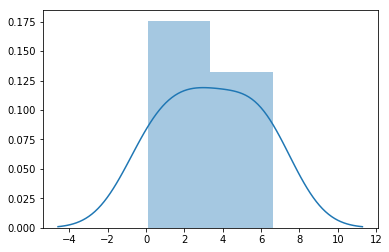

In [9]:
target = df.skew()
sb.distplot(target)

In [10]:
# replace value 1,0 for yes/no
df.replace(['yes','no'],[1,0],inplace=True)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [12]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

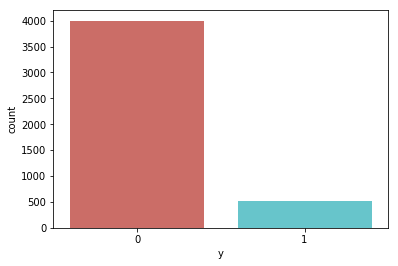

In [13]:
# plot subscription of yes and no
sb.countplot(x='y',  data=df, palette='hls')
plt.show()

In [14]:
df.duplicated().sum()

0

In [15]:
# convert  categorical data into binary data
df = pd.get_dummies(df)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
df.shape

(4521, 49)

In [17]:
len(df.columns)

49

In [18]:
# correlation of multivariate variable
temp=df.corr(method='pearson')
temp.head(11)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,...,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074,0.012693,-0.026179,0.048626,-0.017414
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,...,-0.004950,-0.013687,0.005580,0.008962,-0.017550,-0.014105,-0.040055,0.005801,-0.022410,0.038997
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,...,0.056023,0.021805,-0.070809,0.120363,0.058694,0.005975,0.025719,0.000129,0.029999,-0.033843
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,...,-0.085332,-0.072133,0.412996,0.006073,-0.102506,-0.060410,0.094246,0.046986,-0.088504,-0.062805
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,...,-0.036580,-0.038525,-0.032816,0.023113,-0.024372,-0.028523,-0.011652,-0.018397,-0.050643,0.041107
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.064235,-0.021062,-0.027720,0.075100
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,...,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023,-0.012852,0.008109,0.049255,-0.015239
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,...,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207,-0.094021,-0.030435,-0.058268,0.117375
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,...,-0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.708380,0.382970,0.212188,-0.867713
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,...,-0.084432,0.019445,0.027549,0.055400,0.088764,0.059763,0.475289,0.358382,0.250277,-0.682746


In [19]:
df.shape

(4521, 49)

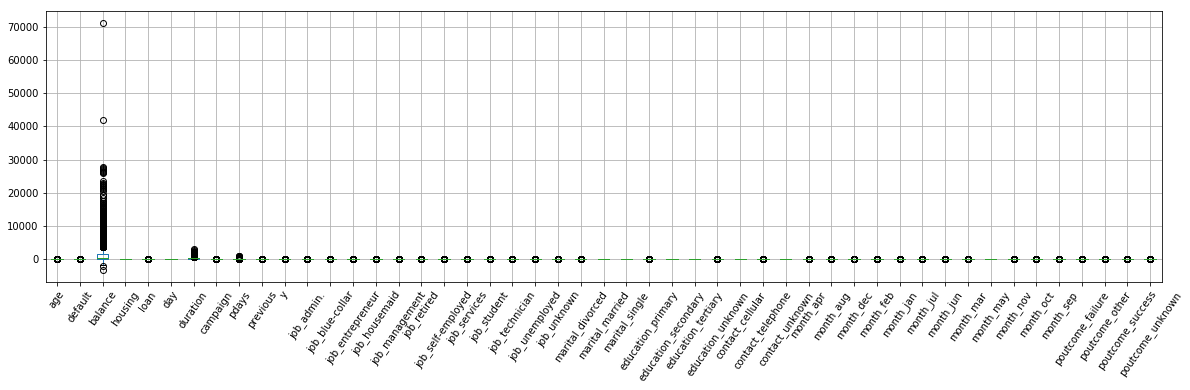

In [20]:
# boxplot dataset
df.boxplot(rot=55, figsize=(20,5))

In [21]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [22]:
df = Feature_Scaling(df)

In [23]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.000000,0.389908,0.16,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.000000,0.379587,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.066667,0.064548,0.061224,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.0,0.044469,1.0,0.0,0.133333,0.073486,0.000000,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


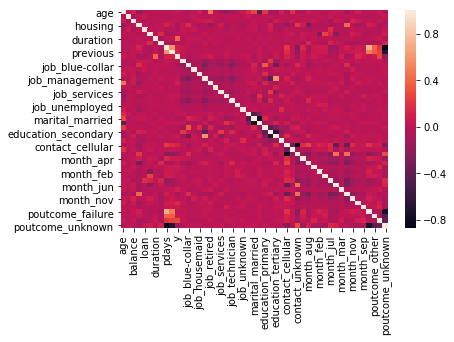

In [24]:
corr = df.corr()
sb.heatmap(corr)

In [25]:
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [26]:
train,test = Split(df)
train_data=df.head(train)
test_data=df.tail(test)
test_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3165,0.500000,0.0,0.044966,0.0,0.0,0.900000,0.015558,0.163265,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3166,0.338235,0.0,0.059986,1.0,0.0,0.633333,0.010924,0.000000,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3167,0.455882,0.0,0.055288,1.0,1.0,0.200000,0.045349,0.142857,0.341743,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3168,0.588235,0.0,0.076429,0.0,0.0,0.966667,0.055942,0.020408,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3169,0.279412,0.0,0.040254,1.0,0.0,0.900000,0.020523,0.020408,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
train_data.shape

(3164, 49)

In [28]:
test_data.shape

(1356, 49)

In [29]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output

In [30]:
train_data_x,train_data_y = separate(train_data)
test_data_x,test_data_y=separate(test_data)

In [31]:
test_data_x.tail()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
4516,0.205882,0.0,0.039999,1.0,0.0,0.966667,0.107580,0.081633,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,0.558824,1.0,0.000000,1.0,1.0,0.266667,0.049321,0.000000,0.000000,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,0.558824,0.0,0.048429,0.0,0.0,0.600000,0.048659,0.204082,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,0.132353,0.0,0.059731,0.0,0.0,0.166667,0.041377,0.061224,0.243119,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4520,0.367647,0.0,0.059717,1.0,1.0,0.066667,0.112877,0.020408,0.286697,0.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
class Multi_Neural_Network:
    def __init__(self):
        self.alpha = 0.01
        self.epoch = 1000
        
    def Train(self, x_data_train, y_data_train):
        Layers =[x_data_train.shape[1], 5, 3, 1]
        a = [0] * len(Layers)
#         a = np.zeros(len(Layers),1)
        a[0] = x_data_train.T
        z = [0] * len(Layers)
        A = [0] *len(Layers)
        dg = [0] * len(Layers)
        dw = [0] * len(Layers)
        db = [0] * len(Layers)
        dz = [0] * len(Layers)
        da = [0] * len(Layers)
        weights = []
        bias = []
        
        
        for i in range(0,len(Layers)):
            weights.append(np.random.rand(Layers[i],Layers[i-1]) * 0.001)
            bias.append(np.zeros((Layers[i],1)))
        print("weights:",len(weights))
        print("biased:",len(bias))
        
        for length in range(self.epoch):
############ forward propagation  ##################
            z1 = np.dot(weights[1], a[0]) + bias[1]
            A1 = (1/(1+np.exp(-z1)))
        
            z2 = np.dot(weights[2], A1) + bias[2]
            A2 = (1/(1+np.exp(-z2)))
        
            z3 = np.dot(weights[3], A2) + bias[3]
            A3 = (1/(1+np.exp(-z3)))
            
#             z[4] = np.dot(weights[4], A[3]) + bias[4]
#             A[4] = (1/(1+np.exp(-z[4])))
        
############# Backward propagation ##################
# hidden layer 3
            dg3 = A3*(1-(A3))
            da3 = (-(y_data_train[i]/A3) + ((1-y_data_train[i])/(1-A3)))
            dz3 = dg3*da3
            dw3 = np.dot(dz3,A2.T)/len(x_data_train)
            db3 = np.dot(Layers[3],1)
            weights[3] = np.subtract(weights[3],np.multiply(self.alpha,dw3))
            bias[3] =  np.subtract(bias[3],np.multiply(self.alpha,db3))
#  hidden layer 2
            dg2 = A2*(1-(A2))
            da2 = (-(y_data_train[i]/A2) + ((1-y_data_train[i])/(1-A2)))
            dz2 = dg2*da2
            dw2 = np.dot(dz2,A1.T)/len(x_data_train)
            db2 = np.dot(Layers[2],1)
            weights[2] = np.subtract(weights[2],np.multiply(self.alpha,dw2))
            bias[2] =  np.subtract(bias[2],np.multiply(self.alpha,db2))
#  hidden layer 1
            dg1 = A1*(1-(A1))
            da1 = (-(y_data_train[i]/A1) + ((1-y_data_train[i])/(1-A1)))
            dz1 = dg1*da1
            dw1 = np.dot(dz1,a[0].T)/len(x_data_train)
            db1 = np.dot(Layers[1],1)
            weights[1] = np.subtract(weights[1],np.multiply(self.alpha,dw1))
            bias[1] =  np.subtract(bias[1],np.multiply(self.alpha,db1))
        print("dz:",dz1.shape)
        print("da:",da1.shape)
        print("dw:",dw1.shape)
        print("db:",db1.shape)
        print("weights:",weights[1].shape)
        print("biassas:",bias[1].shape)
        
        return weights[1],bias[1],weights[2],bias[2],weights[3],bias[3]
    
#         classifing the Train model 
    def classify(self, x_data_test, parameters):  
        a = [0] * 4
        a[0] = x_data_test.T
        z = [0] * 4
        a = [0] * 4
        for i in range(2):  
            z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
            a[i+1] = 1 / (1 + np.exp(-z[i])) 
        return a[-1]
#         return y_predict
#     calculate accuracy of prediction over  output data
    def accuracy(self, y_data_test, y_pred_test):
        y_pred_test = np.nan_to_num(y_pred_test)
    
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_data_test)) * 100)        
        return test_accuracy

def main():
#     class instantiation
    obj = Multi_Neural_Network()
    
    x_train_data = np.array(train_data_x)
    print("x_train_data:",x_train_data.shape)
    y_train_data = np.array(train_data_y)
    y_train_data = y_train_data.reshape(len(y_train_data),1)
    print("y_train_data:",y_train_data.shape)

    
    x_test_data = np.array(test_data_x)
    print("x_test_data:",x_test_data.shape)
    y_test_data = np.array(test_data_y)
    y_test_data=y_test_data.reshape(len(y_test_data),1)
    print("y_test_data:",y_test_data.shape)
    
#     passing parameters to train the model
    parameters = obj.Train(x_train_data, y_train_data)
    
    
#     testing our train model to make prediction over  
    y_predict_test = obj.classify(x_test_data, parameters)
    
#     testing our train model to make prediction over  
    y_predict_train = obj.classify(x_train_data, parameters)

#     get accuracy  by comparing prediction and actual output
    train_accuracy=obj.accuracy(y_train_data, y_predict_train)
    test_accuracy=obj.accuracy(y_test_data, y_predict_test)
    
    print("\nAccuracy Train:", train_accuracy)
    print("Accuracy Test:",  test_accuracy)

if __name__ == '__main__':
    main()

x_train_data: (3164, 48)
y_train_data: (3164, 1)
x_test_data: (1356, 48)
y_test_data: (1356, 1)
weights: 4
biased: 4
dz: (5, 3164)
da: (5, 3164)
dw: (5, 48)
db: ()
weights: (5, 48)
biassas: (5, 1)

Accuracy Train: 88.4323640960809
Accuracy Test: 88.5693215339233
